# Pandas
In this notebook I'll study the [pandas](https://pandas.pydata.org/) python library that is a very famous library for data manipulation and analysis.

In [38]:
# Importing the library
import pandas as pd
import seaborn as sns
print(pd.__version__)
print(sns.__version__)

1.0.5
0.10.1


There is a folder called data in the same directory and we have a csv file called `aluguel.csv` that I'll use as my database for this EDA.
This database contains information about properties and rental prices in the city or Rio de Janeiro in Brazil

In [2]:
!cd data && ls -la

total 3192
drwxr-xr-x  4 nathan  staff      128 Jul 22 11:49 .
drwxr-xr-x  6 nathan  staff      192 Jul 22 14:34 ..
drwxr-xr-x  3 nathan  staff       96 Jul 22 11:49 .ipynb_checkpoints
-rw-r--r--@ 1 nathan  staff  1634127 Jun  8  2018 aluguel.csv


In [3]:
# Loading the data as a pandas DataFrame
aluguel_df = pd.read_csv('data/aluguel.csv', delimiter=";")
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [4]:
type(aluguel_df)

pandas.core.frame.DataFrame

In [5]:
aluguel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [6]:
aluguel_df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


# Information about the DataFrame

In [9]:
aluguel_df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [15]:
aluguel_dtypes = pd.DataFrame(aluguel_df.dtypes, columns=['Types'])
aluguel_dtypes.columns.name = "Columns"
aluguel_dtypes

Columns,Types
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [19]:
(records, columns) = aluguel_df.shape
print("The DataFrame has {} entries and each entry has {} columns"
      .format(records, columns))

The DataFrame has 32960 entries and each entry has 9 columns


## Property types

We know that we have a column called `Tipo` which means type. The first task is: what are all the property types that the `aluguel` DataFrame has?

In [24]:
types = aluguel_df["Tipo"]
types

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [27]:
unique_types = types.unique()
unique_types

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [28]:
print("There are {} property types".format(len(unique_types)))

There are 22 property types


In [33]:
unique_types_series = types.drop_duplicates()
unique_types_series

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [42]:
type_count = aluguel_df["Tipo"].value_counts()
type_count

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Indústria                          1
Chácara                            1
Pousada/Chalé                      1
Name: Tipo, dtype: int64

We already know that the most common type in the dataset is `Apartmento`

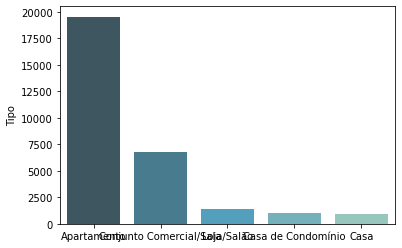

In [72]:
sns.barplot(x=type_count.head(5).index, y=type_count.head(5), palette="GnBu_d")

In [84]:
property_types = pd.DataFrame(unique_types_series)
property_types

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


The index is coming from the original index from the `aluguel` dataframe. Let's reset the indexes so it makes more sense to our EDA.

In [85]:
property_types.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [86]:
property_types.reset_index(drop=True, inplace=True)

In [87]:
property_types.index

RangeIndex(start=0, stop=22, step=1)

In [88]:
property_types

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


The inplace argument mutates the variable. If I don't use it I have to reassign the variable `property_types`